In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings("ignore")


In [2]:
def report(y_true,y_pred):
    print(classification_report(y_true,y_pred))
def matrix(y_true,y_pred, dataset):
    g=confusion_matrix(y_true,y_pred)
    ptypes=pd.DataFrame(dataset["TARGET"].value_counts())
    sns.heatmap(data=g,xticklabels=ptypes.index.sort_values(),yticklabels=ptypes.index.sort_values(),cbar=False,annot=True,cmap="Blues",fmt="g",linewidths=.5,linecolor="black")
    

In [3]:
data=pd.read_csv("E:\piere\Documentos\Portafolio\Oil Play Prediction\Data\processed\data_ready.csv")

In [4]:
X=data.drop("TARGET",axis=1)
y=data["TARGET"]

In [5]:
pt=PowerTransformer()
X=pt.fit_transform(X)

In [6]:
X_train, X_test, y_train , y_test=train_test_split(X, y, test_size=.3, random_state=42)

In [7]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [8]:
y_pred=rf.predict(X_test)

In [9]:
report(y_test,y_pred)

              precision    recall  f1-score   support

          A1       0.65      0.42      0.51       332
         AP1       0.17      0.05      0.07        22
          B1       1.00      1.00      1.00         4
          F1       0.80      0.61      0.69       571
          F2       0.95      0.99      0.97       283
          P1       0.83      0.95      0.88      2634
          R1       1.00      0.03      0.06        66
          S1       1.00      0.12      0.21        52
          X1       1.00      0.14      0.25         7
          X2       0.73      0.55      0.63        20

    accuracy                           0.82      3991
   macro avg       0.81      0.49      0.53      3991
weighted avg       0.82      0.82      0.80      3991



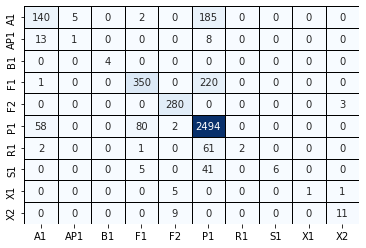

In [10]:
matrix(y_test,y_pred,data)

Como podemos observar, al momento de realizar la predicción con valores normalizados por el método de PowerTransform de Scikit-Learn, solamente aumentamos un .1% mi accuracy. Esto se lo podemos atribuir que tenemos una data Unbalance, por la cantidad de datos de P1 con respecto a los demás, cuestión que buscaremos reducir en el siguiente capítulo.

In [11]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [12]:
y_enconder=LabelEncoder().fit_transform(y)

In [13]:
counter=Counter(y_enconder)

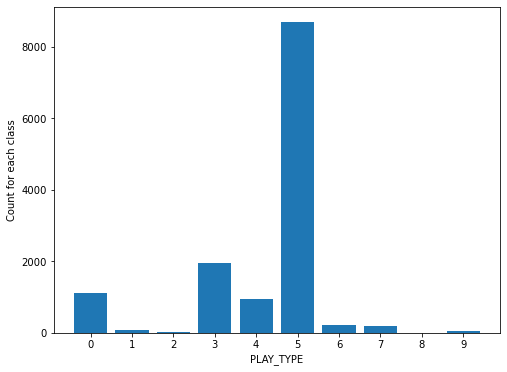

In [14]:
plt.figure(figsize=(8,6))
plt.bar(counter.keys(),counter.values())
plt.xticks([i for i in range (0,10)])
plt.xlabel("PLAY_TYPE")
plt.ylabel("Count for each class")
plt.show()

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
oversample=SMOTE()
X_over , y_over = oversample.fit_resample(X, y_enconder)

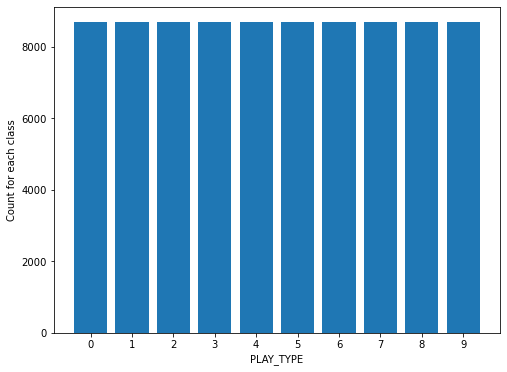

In [17]:
counter=Counter(y_over)
plt.figure(figsize=(8,6))
plt.bar(counter.keys(),counter.values())
plt.xticks([i for i in range (0,10)])
plt.xlabel("PLAY_TYPE")
plt.ylabel("Count for each class")
plt.show()

Como observamos, ya logramos equilibrar las clases mi DataSet mediante la función SMOTE de replicar los datos de mi data.

In [78]:
X_train, X_test, y_train , y_test=train_test_split(X_over, y_over, test_size=.5, random_state=42)
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [79]:
report(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4311
           1       0.99      1.00      0.99      4326
           2       1.00      1.00      1.00      4496
           3       0.89      0.94      0.91      4373
           4       1.00      1.00      1.00      4260
           5       0.87      0.73      0.79      4298
           6       0.95      0.99      0.97      4367
           7       0.97      1.00      0.98      4350
           8       1.00      1.00      1.00      4285
           9       1.00      1.00      1.00      4354

    accuracy                           0.96     43420
   macro avg       0.96      0.96      0.96     43420
weighted avg       0.96      0.96      0.96     43420



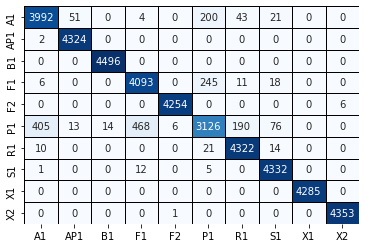

In [80]:
matrix(y_test,y_pred,data)

Como evidenciamos obtuvimos un muy resultado. Sin embargo, ahora analizaremos si tenemos overtfitting en mi modelo

In [81]:
y_pred_trein=rf.predict(X_train)

In [82]:
report(y_train,y_pred_trein)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4373
           1       1.00      1.00      1.00      4358
           2       1.00      1.00      1.00      4188
           3       1.00      1.00      1.00      4311
           4       1.00      1.00      1.00      4424
           5       1.00      1.00      1.00      4386
           6       1.00      1.00      1.00      4317
           7       1.00      1.00      1.00      4334
           8       1.00      1.00      1.00      4399
           9       1.00      1.00      1.00      4330

    accuracy                           1.00     43420
   macro avg       1.00      1.00      1.00     43420
weighted avg       1.00      1.00      1.00     43420



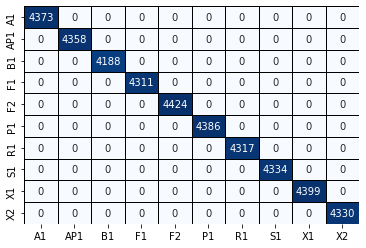

In [83]:
matrix(y_train, y_pred_trein, data)

Puedo evaluar mi modelo con los datos originales para ver que valores me arrojan